<a href="https://colab.research.google.com/github/cocoisland/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module2-polynomial-regression/Polynomial_Log_linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## You model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

In [128]:
##### Your Code Here #####
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'
df = pd.read_csv(url, na_values=['?'])

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [129]:
# Identifying y target and logarithmic
print('df SalePrice:\n',df.SalePrice.describe())
Y = np.log(df.SalePrice)

print('\nY Logirithmic :\n',Y.describe())

df SalePrice:
 count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Y Logirithmic :
 count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64


In [0]:
# Separate out the numeric from non-numeric features.

#df.dtypes
df_num = df.select_dtypes(include=['int64','float64']).copy()
df_obj = df.select_dtypes(include=['object']).copy()

In [0]:
#df_num.drop(['Id','SalePrice'], axis=1, inplace=True)

In [0]:
# clean NAN data
df_num[df_num.isnull().any(axis=1)]

In [0]:
df_num=df_num.fillna(value=0)

In [0]:
df_num.describe()

In [149]:
# Find the most correlated features to SalePrice

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
features=list(df_num.columns.values)
features.remove('SalePrice')

Y= np.log(df_num.SalePrice)

R2_features = []
for f in features:
  X = df_num[f]
  X=X.values.reshape(-1,1)
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5, random_state=42)
  model.fit(X_train, Y_train)
  Y_test_predicted = model.predict(X_test)
  R2 = r2_score(Y_test, Y_test_predicted)
  #print('X={}\t\tR2={}'.format(f, R2))
  if (R2 >= 0.1 ):
    R2_features.append(f)
    print('X={}\t\tR2={}'.format(f, R2))

X=OverallQual		R2=0.6905406624673225
X=YearBuilt		R2=0.3677827784123179
X=YearRemodAdd		R2=0.32604684425390096
X=MasVnrArea		R2=0.20397384297317667
X=BsmtFinSF1		R2=0.15582902435520818
X=TotalBsmtSF		R2=0.41558592347593615
X=1stFlrSF		R2=0.37661790524107
X=2ndFlrSF		R2=0.10803040545859532
X=GrLivArea		R2=0.5229000551118719
X=FullBath		R2=0.38306206456943737
X=TotRmsAbvGrd		R2=0.31120943924400457
X=Fireplaces		R2=0.24987432724375236
X=GarageYrBlt		R2=0.1214979752716443
X=GarageCars		R2=0.4764212462058022
X=GarageArea		R2=0.44714919604239056
X=WoodDeckSF		R2=0.10285742402028486
X=OpenPorchSF		R2=0.11815417477025514


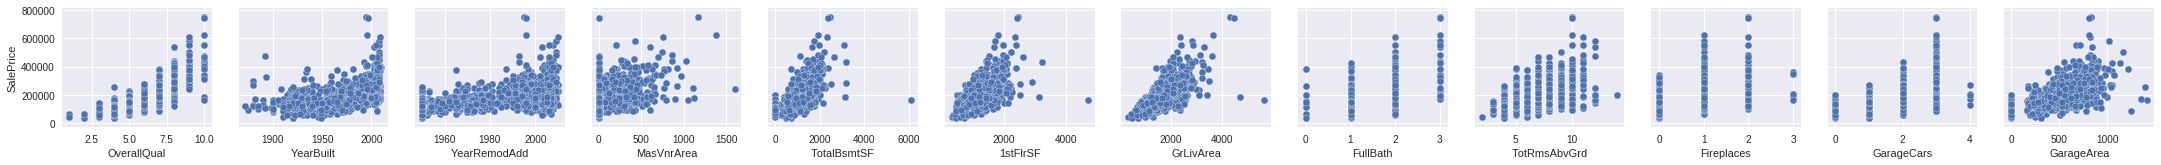

In [142]:
import seaborn as sns
sns.pairplot(data=df_num, y_vars=['SalePrice'], x_vars=R2_features)

In [0]:
# Remove Outlier


df_out = df_num.copy()

for q in R2_features:
  Q1=df_out[q].quantile(0.25)
  Q3=df_out[q].quantile(0.75)
  IQR = (Q3-Q1)
  x=Q1- 1.5* IQR
  y=Q3 + 1.5* IQR
  df_out= df_out[~( (df_out[q] < x )|(df_out[q] > y) )]
  


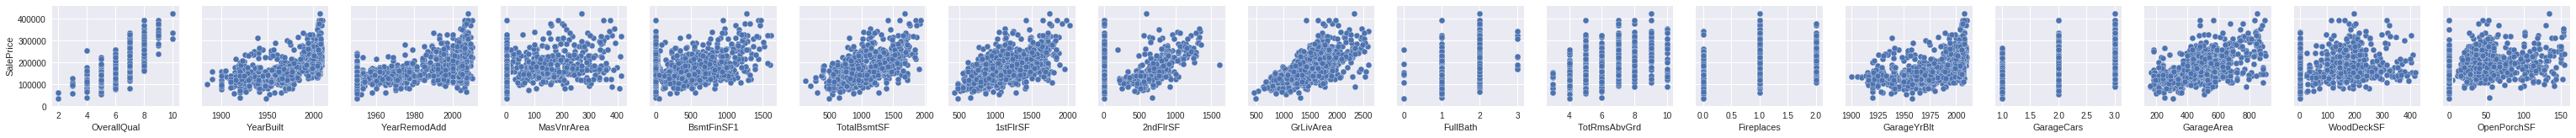

In [151]:
sns.pairplot(data=df_out, y_vars=['SalePrice'], x_vars=R2_features)


In [152]:
# R2 Correlation above 0.2 and Outlier remove
# Less features in LinearRegression, lower R2 and higher RSME

Y_out = np.log(df_out.SalePrice)
Y=Y_out
df_out.drop('SalePrice', axis=1, inplace=True)

#X = df_num[R2_features]
X = df_out[R2_features]

# Split train and test data in half
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.5, random_state=42)

# fit and predict Y
model.fit(X_train, Y_train)
y_test_predict = model.predict(X_test)

# Coefficients
#beta_i = model.coef_
#beta_0 = model.intercept_
#print('Beta_0: ', beta_0)
#print('Beta_i:]', beta_i)

MSE = mean_squared_error(Y_test, y_test_predict)
RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)
print('R^2 is {}'.format(R2))

MSE is 0.019504846059325242
RMSE is 0.13965975103559808
R^2 is 0.8225577199498157


In [153]:
# All numeric X features with R2_feature outlier remove
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

#Y = np.log(df_num.SalePrice)
#df_num.drop('SalePrice', axis=1, inplace=True)
Y=Y_out
X = df_out

# Split train and test data in half
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.5, random_state=42)

# fit and predict Y
model.fit(X_train, Y_train)
y_test_predict = model.predict(X_test)

# Coefficients
beta_i = model.coef_
beta_0 = model.intercept_
#print('Beta_0: ', beta_0)
#print('Beta_i:]', beta_i)

print('\n')

MSE = mean_squared_error(Y_test, y_test_predict)
RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)
print('R^2 is {}'.format(R2))



MSE is 0.015587340174533906
RMSE is 0.12484926981978672
R^2 is 0.8581966157500237


In [154]:
# Standardizing the X features has NO impact on Linear Regression

from sklearn.preprocessing import StandardScaler
Xstd=StandardScaler().fit_transform(df_out)
Y=Y_out
X = Xstd

# Split train and test data in half
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.5, random_state=42)

# fit and predict Y
model.fit(X_train, Y_train)
y_test_predict = model.predict(X_test)

MSE = mean_squared_error(Y_test, y_test_predict)
RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)
print('R^2 is {}'.format(R2))

MSE is 0.015587170708795369
RMSE is 0.12484859113660582
R^2 is 0.8581981574380199


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [194]:
df_obj.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [0]:
df_obj=df_obj.fillna(value=1)

In [199]:
df_obj.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [0]:
Binary_conv={'Alley':{'Grvl':0,'Pave':1}, 'Street':{'Grvl':0,'Pave':1},'Utilities':{'AllPub':1,'NoSeWa':0}}
df_obj.replace(Binary_conv, inplace=True)


In [0]:
df_num['Alley'] = df_obj['Alley']
df_num['Street'] = df_obj['Street']
df_num['Utilities'] = df_obj['Utilities']

In [0]:
SaleCondition_conv={'SaleCondition':{'Family':6,'Normal':5,'Partial':4,'Abnorml':3,'Alloca':2,'AdjLand':1}}
df_obj.replace(SaleCondition_conv, inplace=True)

In [0]:
MSZoning_conv={'MSZoning':{'RH':8,'RM':7,'RP':6,'RL':5,'FV':4,'C (all)':3,'I':2,'A':1}}
df_obj.replace(MSZoning_conv, inplace=True)

In [0]:
df_num['SaleCondition'] = df_obj['SaleCondition']
df_num['MSZoning'] = df_obj['MSZoning']

In [0]:
df_num.MSZoning=np.power(df_num.MSZoning,2)
df_num.SaleCondition=np.power(df_num.SaleCondition,2)

# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Start studying for tomorrow's topic: Gradient Descent
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data